
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 5 - RL <br>
<font color=696880 size=4>
Amirmahdi Meighani


____

# Personal Data

In [ ]:
# Set your student number and name
student_number = "401105689"
Name = "Sana"
Last_Name = "Babayan"

# Rules

<font color=red>
Please run all the cells.
</font>

# Q1: Mountain Car (100 Points)

In this notebook we have a game called mountain car. the car is in a valley and at evey moment we can model its state using two floats as speed and location along x axis. You can control the car using three actions.

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

the goal is to reach the peak of mountain in the minimum number of frames. because you get -1 reward for evey timestamp.

you should model the countious enviroment with a approximate descrete one and train your agent using Q learning and SARSA algorithms.


install required libraries

In [2]:
!pip install numpy
!pip install matplotlib
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 1.6 MB/s eta 0:00:00


## imports

In [12]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [13]:
def visualize(env):
    '''
    use this function to see the state of the game in the current moment
    '''
    env_screen = env.render()
    plt.imshow(env_screen)
    plt.axis('off');
    title = 'speed is ' + str(env.unwrapped.state[1])

    plt.title(title)
    plt.show()

## Q Learning

in this question we have a countious enviroment but you can approximate it as a discrete enviormnet then learn and act according to that.

you can see the information of game below.

In [14]:
env = gym.make("MountainCar-v0",render_mode='rgb_array',max_episode_steps=200)
spec = gym.spec('MountainCar-v0')

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0



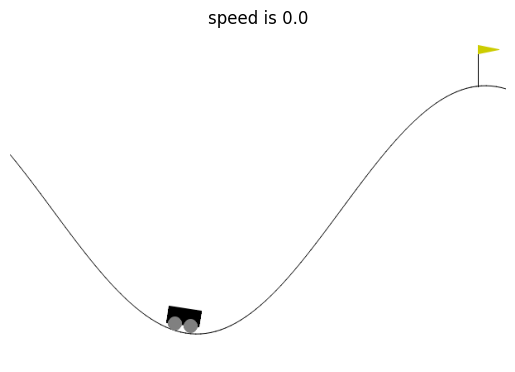

In [15]:
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")
env.reset()
visualize(env)

Observation Space:
The observation is a ndarray with shape (2,) where the elements correspond to the following:

| Num |              Observation             |  Min  |  Max |
|:---:|:------------------------------------:|:-----:|:----:|
|  0  | position of the car along the x-axis |  -1.2 |  0.6 |
|  1  | velocity of the car                  | -0.07 | 0.07 |

Action Space:
There are 3 discrete deterministic actions:

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

You can play in this env yourself!!!

Try some actions and visulize the env after every 5 action. use env.step(action) function to do actions. print output of some step function. It returns five values :

new_state, reward, is_terminated ,is_truncated ,extra_info

new state after the action, reward for that action in that step, is the game terminated by reaching the goal, is the game finished by reaching 200 episode limit that is the default in this game, and some possible extra info that we don't use.


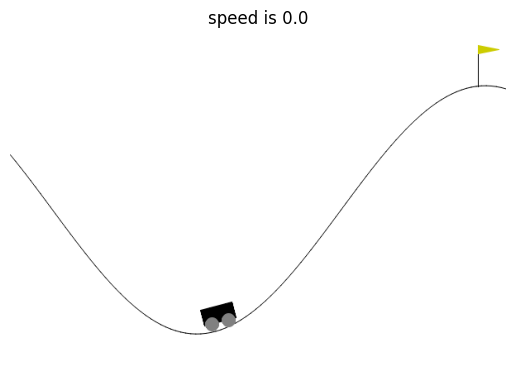

Step 1
Action: 2
New State: [-4.3631557e-01  3.5540623e-04]
Reward: -1.0
Is Terminated: False
Is Truncated: False
Extra Info: {}

Step 2
Action: 2
New State: [-0.43560734  0.00070824]
Reward: -1.0
Is Terminated: False
Is Truncated: False
Extra Info: {}

Step 3
Action: 2
New State: [-0.43455142  0.00105594]
Reward: -1.0
Is Terminated: False
Is Truncated: False
Extra Info: {}

Step 4
Action: 0
New State: [-0.4351554 -0.000604 ]
Reward: -1.0
Is Terminated: False
Is Truncated: False
Extra Info: {}

Step 5
Action: 1
New State: [-0.436415   -0.00125957]
Reward: -1.0
Is Terminated: False
Is Truncated: False
Extra Info: {}



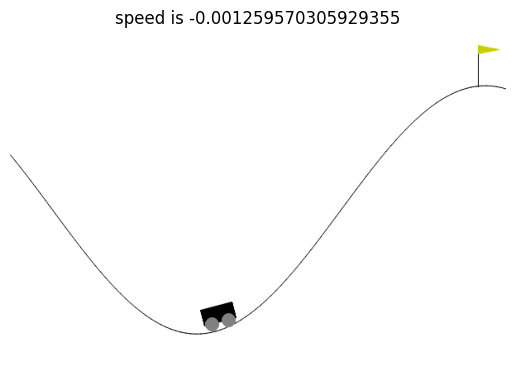

Step 6
Action: 2
New State: [-0.437321   -0.00090602]
Reward: -1.0
Is Terminated: False
Is Truncated: False
Extra Info: {}

Step 7
Action: 2
New State: [-0.4378669 -0.0005459]
Reward: -1.0
Is Terminated: False
Is Truncated: False
Extra Info: {}

Step 8
Action: 0
New State: [-0.44004872 -0.00218182]
Reward: -1.0
Is Terminated: False
Is Truncated: False
Extra Info: {}

Step 9
Action: 1
New State: [-0.44285062 -0.00280191]
Reward: -1.0
Is Terminated: False
Is Truncated: False
Extra Info: {}

Step 10
Action: 2
New State: [-0.44525224 -0.00240162]
Reward: -1.0
Is Terminated: False
Is Truncated: False
Extra Info: {}



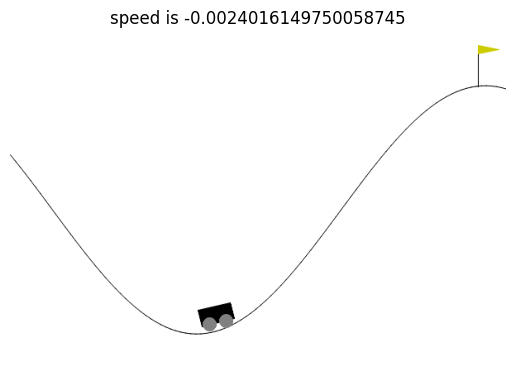

(array([-0.4786555,  0.       ], dtype=float32), {})

In [16]:
env.reset()

# Visualize initial state
visualize(env)

# Try some actions and visualize the environment after every 5 actions
actions = [2, 2, 2, 0, 1, 2, 2, 0, 1, 2]  # A sequence of actions to try
for i, action in enumerate(actions):
    new_state, reward, is_terminated, is_truncated, extra_info = env.step(action)
    print(f"Step {i+1}")
    print(f"Action: {action}")
    print(f"New State: {new_state}")
    print(f"Reward: {reward}")
    print(f"Is Terminated: {is_terminated}")
    print(f"Is Truncated: {is_truncated}")
    print(f"Extra Info: {extra_info}\n")

    # Visualize the environment every 5 actions
    if (i + 1) % 5 == 0:
        visualize(env)

# Reset the environment at the end
env.reset()

the state consists of two floats.  first one is position in x axis and second one is speed. in the next cell we will write our agent. First we need to convert continuous state to descrete so complete the relevant functions. after that we need to train our agent using Q_learning formula:


$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

After training we use create policy to save your best actions. Then evaluate your policy.

In [35]:
class MountainCarQL:
    def __init__(self, env, discrete_size=40):
        self.discrete_size = discrete_size
        self.env = env
        self.q_values = self.create_q_values_list()
        self.policy = {}
        self.position_bins = np.linspace(env.observation_space.low[0], env.observation_space.high[0], discrete_size)
        self.velocity_bins = np.linspace(env.observation_space.low[1], env.observation_space.high[1], discrete_size)

    def create_q_values_list(self):
        return np.zeros((self.discrete_size, self.discrete_size, self.env.action_space.n))

    def get_discrete_state(self, state):
        position, velocity = state
        position_bin = np.digitize(position, self.position_bins) - 1
        velocity_bin = np.digitize(velocity, self.velocity_bins) - 1
        return position_bin, velocity_bin

    def learn(self, num_episodes, alpha, gamma, epsilon):
        for episode in range(num_episodes):
            state, _ = self.env.reset()
            discrete_state = self.get_discrete_state(state)
            done = False
            while not done:
                if np.random.random() < epsilon:
                    action = self.env.action_space.sample()
                else:
                    action = np.argmax(self.q_values[discrete_state])
                next_state, reward, done, truncated, _ = self.env.step(action)
                next_discrete_state = self.get_discrete_state(next_state)
                max_future_q = np.max(self.q_values[next_discrete_state])
                current_q = self.q_values[discrete_state][action]
                new_q = (1 - alpha) * current_q + alpha * (reward + gamma * max_future_q)
                self.q_values[discrete_state][action] = new_q
                discrete_state = next_discrete_state
            if episode % 1000 == 0:
                print(f"Episode: {episode}")

    def create_policy(self):
        for position_bin in range(self.discrete_size):
            for velocity_bin in range(self.discrete_size):
                self.policy[(position_bin, velocity_bin)] = np.argmax(self.q_values[position_bin, velocity_bin])

    def act(self):
        state, _ = self.env.reset()
        discrete_state = self.get_discrete_state(state)
        done = False
        step_count = 0
        while not done:
            action = self.policy[discrete_state]
            next_state, reward, done, truncated, _ = self.env.step(action)
            discrete_state = self.get_discrete_state(next_state)
            step_count += 1
            if step_count % 10 == 0 or done:
                visualize(self.env)
                plt.pause(0.1)

    def evaluate(self, num_episodes):
        total_rewards = 0
        successful_episodes = 0
        for _ in range(num_episodes):
            state, _ = self.env.reset()
            discrete_state = self.get_discrete_state(state)
            done = False
            episode_reward = 0
            while not done:
                action = self.policy[discrete_state]
                next_state, reward, done, truncated, _ = self.env.step(action)
                episode_reward += reward
                discrete_state = self.get_discrete_state(next_state)
                if next_state[0] >= self.env.goal_position:
                    successful_episodes += 1
                    break
            total_rewards += episode_reward
        average_reward = total_rewards / num_episodes
        win_percentage = successful_episodes / num_episodes * 100
        return average_reward, win_percentage

train your agent with good parameters

In [36]:
EPISODES = 15000
LEARNING_RATE = 0.1
DISCOUNT = 0.99
EPSILON = 0.1
DISCRETE_SIZE = 40
mountain_car_ql = MountainCarQL(env,discrete_size=DISCRETE_SIZE)
mountain_car_ql.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)

Episode: 0
Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000
Episode: 10000
Episode: 11000
Episode: 12000
Episode: 13000
Episode: 14000


evaluate your agent with at least 200 episodes. your average score must be more than -170.

In [38]:
mountain_car_ql.create_policy()
num_evaluation_episodes = 200
average_reward, win_percentage = mountain_car_ql.evaluate(num_evaluation_episodes)
print(f"Average Reward: {average_reward}")
print(f"Win Percentage: {win_percentage}%")

Average Reward: -164.035
Win Percentage: 100.0%


show the path your car took for only one episode. Use visualize function every 10 frame.

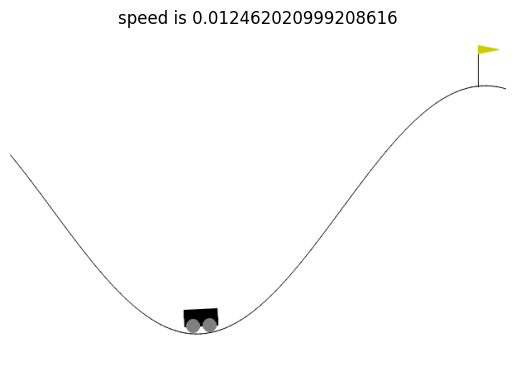

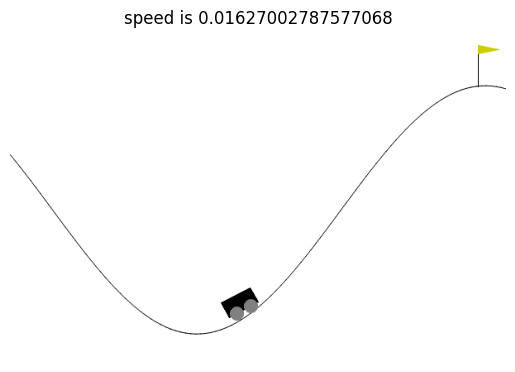

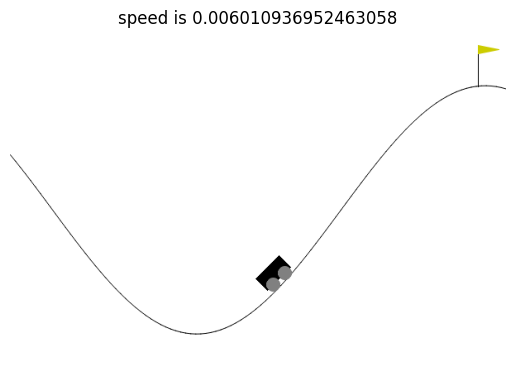

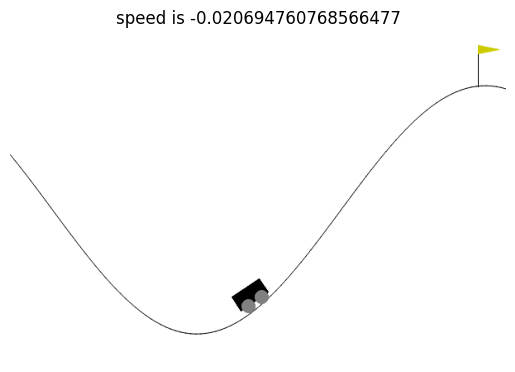

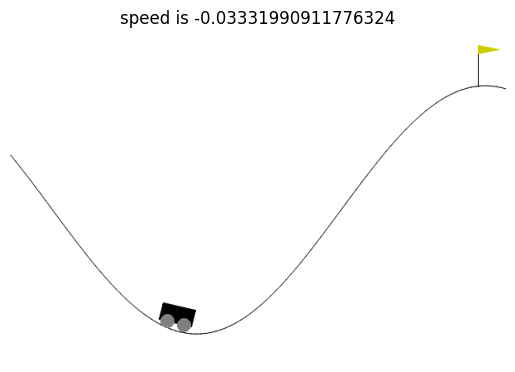

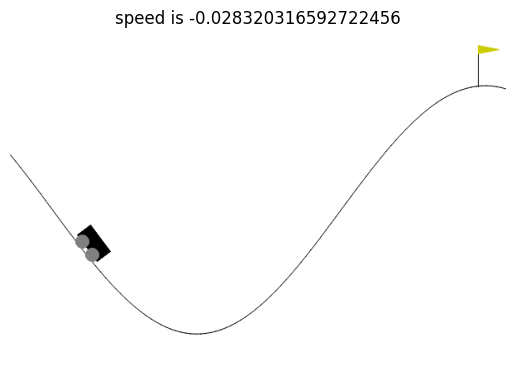

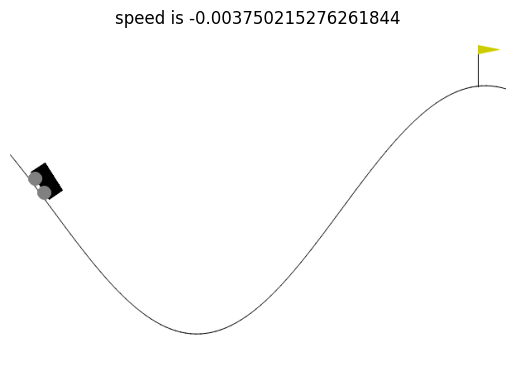

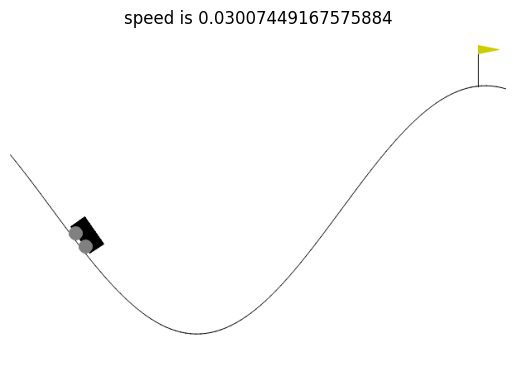

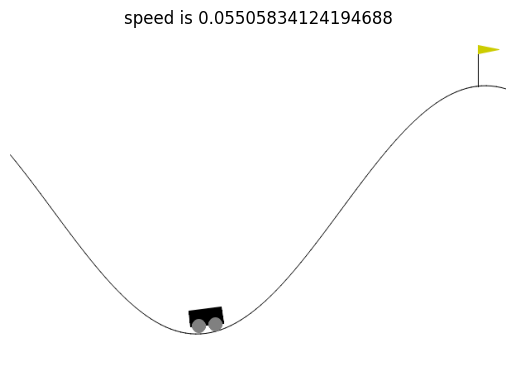

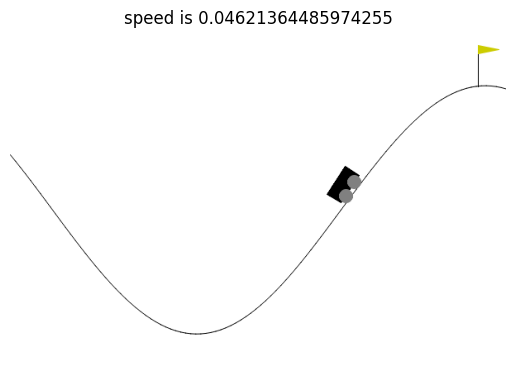

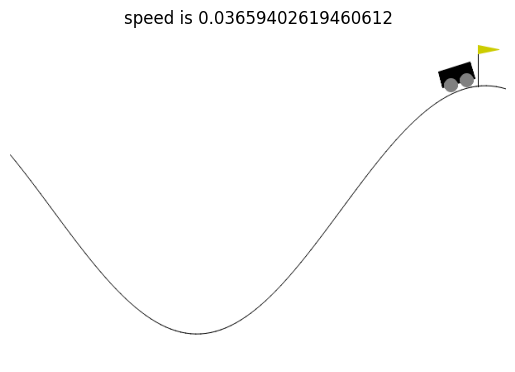

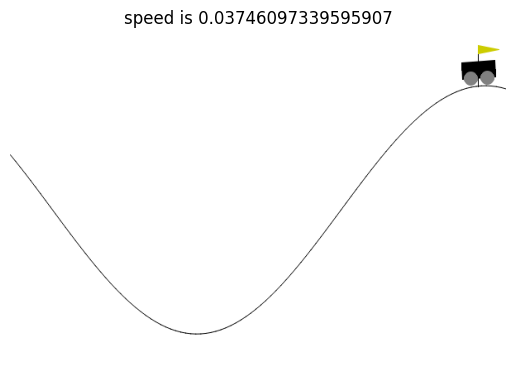

In [ ]:
mountain_car_ql.act()

## SARSA
now we want to use sarsa algorithm here instead of Q learning. The update rule is:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$

In [29]:
class MountainCarSarsa(MountainCarQL):

    def learn(self, num_episodes, alpha, gamma, epsilon):
        for episode in range(num_episodes):
            done = False
            index = 0
            discrete_state = self.get_discrete_state(env.reset()[0])
            act = np.argmax(self.q_values[discrete_state])
            if random.random() < epsilon:
                act = random.randint(0, 2)
            while not done:
                new_state, reward, terminated ,truncated ,_ = env.step(act)
                done = truncated or terminated
                new_discrete_state = self.get_discrete_state(new_state)
                new_act = np.argmax(self.q_values[new_discrete_state])
                if random.random() < epsilon:
                    new_act = random.randint(0, 2)
                if not done:
                    future_q = self.q_values[new_discrete_state][new_act]
                    current_q = self.q_values[discrete_state + (act, )]
                    new_q = alpha * (reward + gamma * future_q) + (1 - alpha) * current_q
                    self.q_values[discrete_state + (act, )] = new_q
                elif new_state[0] >= env.unwrapped.goal_position:
                    self.q_values[discrete_state + (act, )] = 0
                discrete_state = new_discrete_state
                act = new_act
                index+=1
            if episode % 1000 == 0:
              print(f"Episode: {episode}")

train your agent with good parameters

In [30]:
EPISODES = 15000
LEARNING_RATE = 0.1
DISCOUNT = 0.99
EPSILON = 0.1
DISCRETE_SIZE = 40
env.reset()
mountain_car_sarsa = MountainCarSarsa(env, discrete_size=DISCRETE_SIZE)
mountain_car_sarsa.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)

Episode: 0
Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000
Episode: 10000
Episode: 11000
Episode: 12000
Episode: 13000
Episode: 14000


evaluate your agent with at list 200 episodes. your average score must be more than -175.

In [33]:
mountain_car_sarsa.create_policy()
average_reward, win_percentage = mountain_car_sarsa.evaluate(200)
print(f"Average Reward: {average_reward}\nWin Percentage: {win_percentage}")

Average Reward: -142.75
Win Percentage: 100.0


show the path your car took for only one episode. Use visualize function every 10 frame.

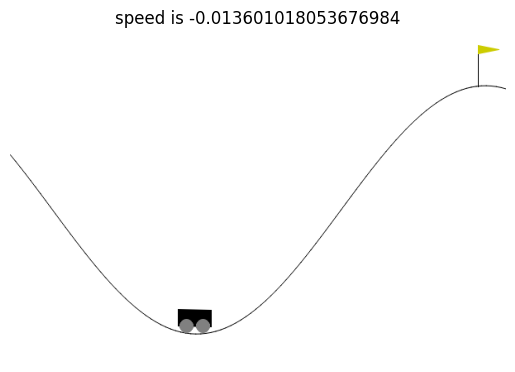

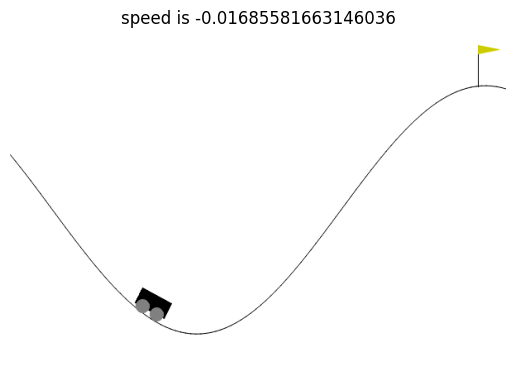

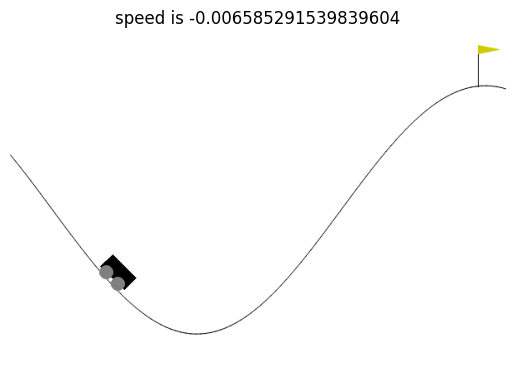

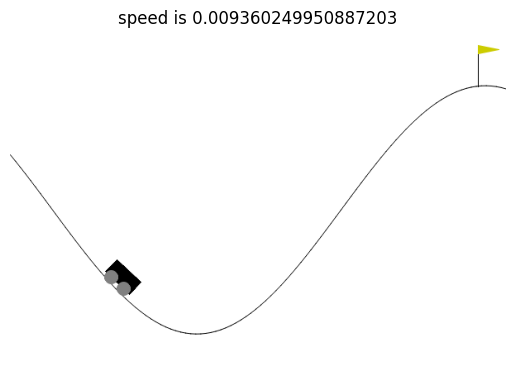

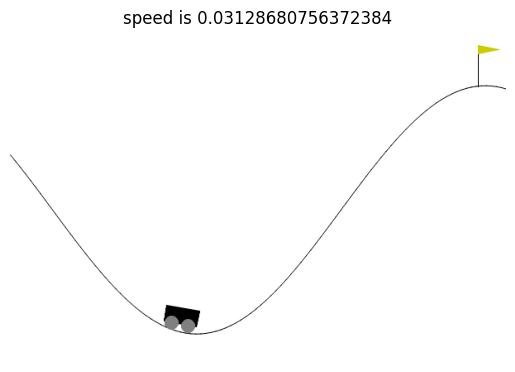

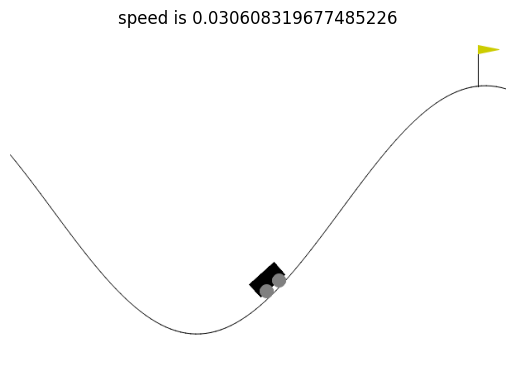

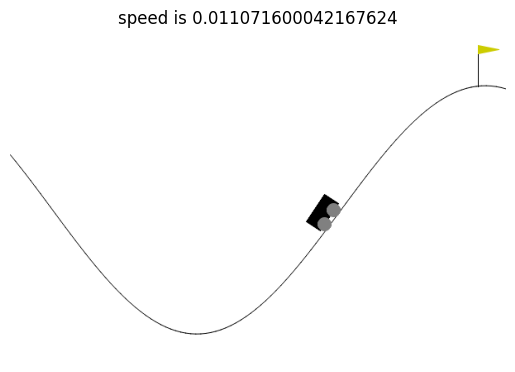

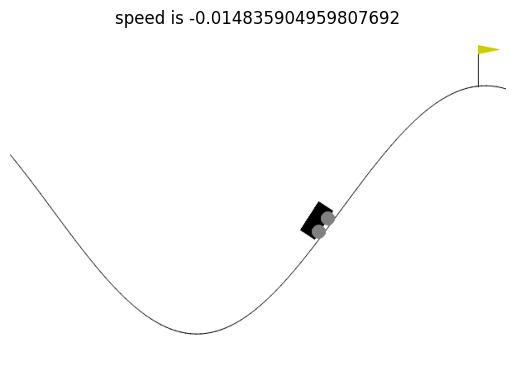

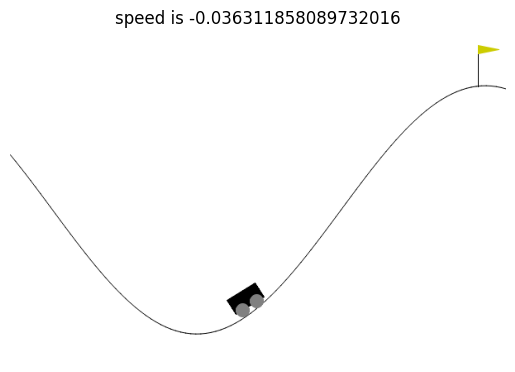

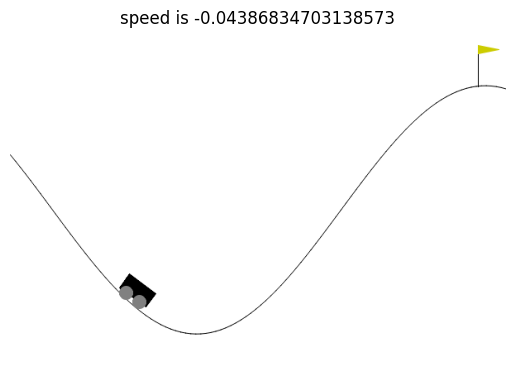

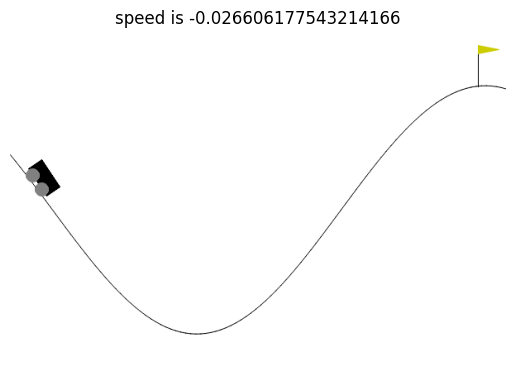

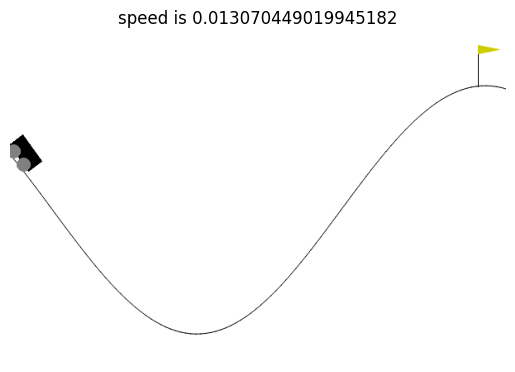

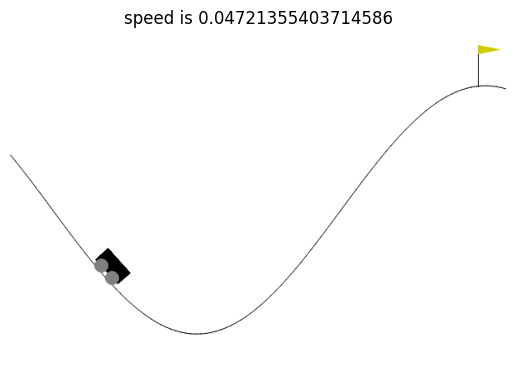

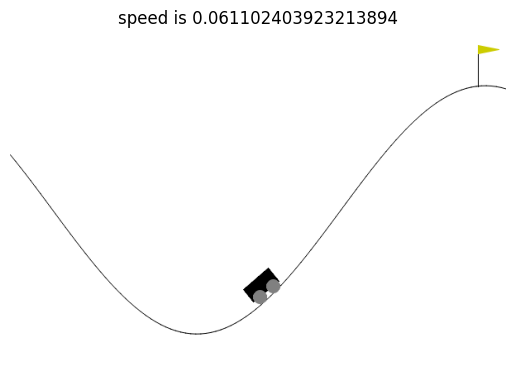

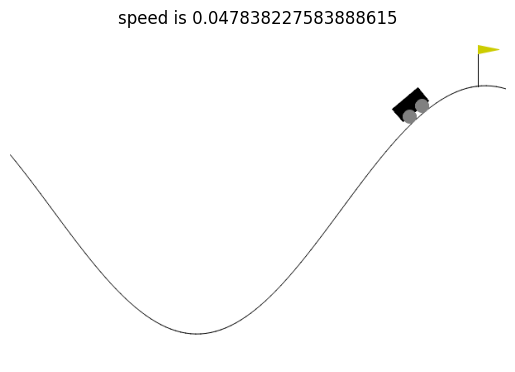

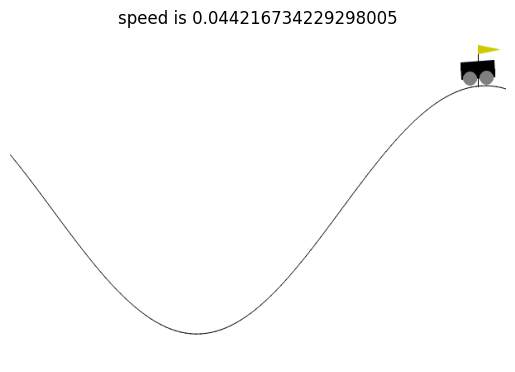

In [32]:
mountain_car_sarsa.act()

Is there any difference between the two algorithms? Compare results and explain why.

Answer:...

Key Differences between Q-Learning and SARSA
Update Rule:

Q-Learning (Off-Policy): The Q-Learning update rule uses the maximum future Q-value (best possible action) for the next state, regardless of the policy being followed.

𝑄
(
𝑠
,
𝑎
)
←
𝑄
(
𝑠
,
𝑎
)
+
𝛼
(
𝑟
+
𝛾
max
⁡
𝑎
′
𝑄
(
𝑠
′
,
𝑎
′
)
−
𝑄
(
𝑠
,
𝑎
)
)
Q(s,a)←Q(s,a)+α(r+γ
a
′

max
​
 Q(s
′
 ,a
′
 )−Q(s,a))
SARSA (On-Policy): The SARSA update rule uses the actual action taken in the next state according to the current policy.

𝑄
(
𝑠
,
𝑎
)
←
𝑄
(
𝑠
,
𝑎
)
+
𝛼
(
𝑟
+
𝛾
𝑄
(
𝑠
′
,
𝑎
′
)
−
𝑄
(
𝑠
,
𝑎
)
)
Q(s,a)←Q(s,a)+α(r+γQ(s
′
 ,a
′
 )−Q(s,a))

Here,
𝑎
′
a
′
  is the action taken in the next state
𝑠
′
s
′
  as per the policy.
Policy Nature:

Q-Learning: As an off-policy algorithm, Q-Learning learns the optimal policy by considering the best actions (greedy) even if the current policy is exploratory.
SARSA: As an on-policy algorithm, SARSA learns the policy based on the actions actually taken, which includes the exploration component of the policy.
Impact on Performance
Exploration vs. Exploitation:

Q-Learning: Tends to be more optimistic as it always considers the best possible action, which might lead to faster convergence to the optimal policy but can also result in overestimation and unstable learning.
SARSA: Takes into account the actual policy, including exploratory actions, leading to more stable and conservative learning, especially in environments with high variability or where exploration is crucial.
Risk Sensitivity:

Q-Learning: May perform well in deterministic or low-risk environments but can struggle in high-risk scenarios due to its optimistic updates.
SARSA: Better suited for environments with high risk or variability as it learns the value of the policy being followed, resulting in more cautious behavior.
Comparing Results
To compare Q-Learning and SARSA, you would typically look at:

Average Reward: Reflects how well the agent is performing on average per episode.
Win Percentage: Indicates the proportion of episodes where the agent successfully achieves its goal.
Hypothetical Results Comparison
Q-Learning:

Average Reward: Higher initially but may plateau or fluctuate due to overestimations.
Win Percentage: High in stable environments but may be inconsistent in more complex settings.
SARSA:

Average Reward: More stable and consistent but may be lower initially as it accounts for exploration.
Win Percentage: Consistent and reliable, particularly in environments requiring careful exploration.
Explanation of Hypothetical Results:
Q-Learning might show higher average rewards and faster convergence initially but could exhibit instability in complex environments due to its optimistic updates.
SARSA is expected to have more stable learning curves and consistent performance, especially in stochastic or high-risk environments, due to its on-policy nature.
Ultimately, the choice between Q-Learning and SARSA depends on the specific characteristics and requirements of the environment and the problem at hand.
